# 🌼 K-Nearest Neighbors (KNN) Classification Tutorial with Iris Dataset
In this notebook, we’ll explore the KNN algorithm using the Iris flower dataset. We’ll build the model step by step, tune it, and visualize its performance.

## 📦 Step 1: Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

## 🌸 Step 2: Load the Iris Dataset

In [11]:
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# DataFrame for exploration
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 📋 Step 3: Dataset Summary

In [3]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [4]:
df['species'].value_counts().sort_index().rename(index={0:'setosa', 1:'versicolor', 2:'virginica'})

,count
species,
setosa,50
versicolor,50
virginica,50


## 📊 Step 4: Visualize the Data

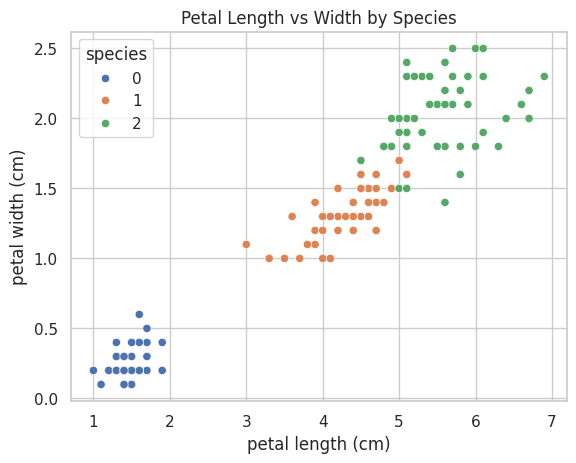

In [5]:
sns.set(style='whitegrid')
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='species', palette='deep')
plt.title('Petal Length vs Width by Species')
plt.show()

## ⚖️ Step 5: Preprocessing - Scaling and Train/Test Split

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## 🤖 Step 6: Train KNN Classifier

In [7]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

## 🧪 Step 7: Evaluate the Model

In [8]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## 📉 Step 8: Confusion Matrix Visualization

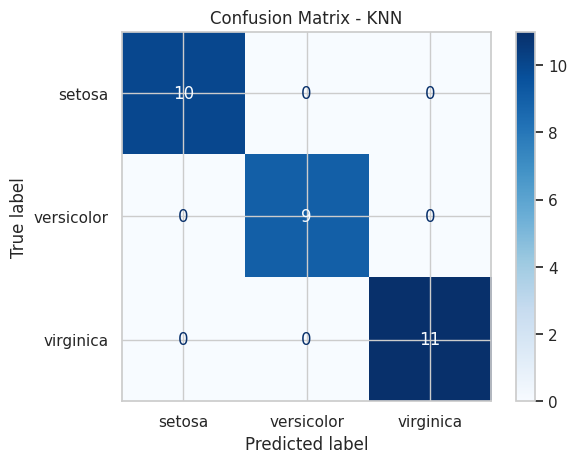

In [9]:
disp = ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, display_labels=class_names, cmap='Blues')
disp.ax_.set_title("Confusion Matrix - KNN")
plt.show()

## 🔍 Step 9: ROC Curve (Multiclass)

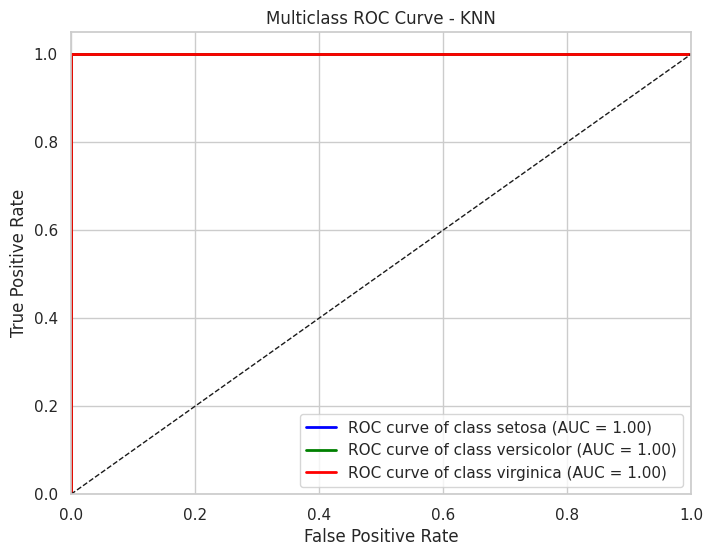

In [10]:
# Binarize the output for multiclass ROC
y_bin = label_binarize(y, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

# Split again for ROC (ensure binary labels match y)
X_train, X_test, y_train_bin, y_test_bin = train_test_split(X_scaled, y_bin, test_size=0.2, random_state=42)

# One-vs-Rest KNN
knn_ovr = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=3))
knn_ovr.fit(X_train, y_train_bin)
y_score = knn_ovr.predict_proba(X_test)

# Compute ROC curve and AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (AUC = {1:0.2f})'.format(class_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve - KNN")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()